# Part (b): Introduction to Data Analytics
# NEHA NAIR - PES2UG22CS348
# NATASHA SANTOSH - PES2UG22CS342
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com


The assignment has the below problems:
- Problem 1
- Problem 2
- Problem 3
- Problem 4
- Problem 5
- Problem 6

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


# About The Dataset
The below is a sample dataset on the customer satisfaction based on experience from a purchased product.

- CustomerID - Unique identifier of each customer.
- Age: Customers age.
- Gender of the customer.
- Satisfaction Score: On a scale from 1 to 10.
- Purchase Frequency.
- Feedback by the customer.

*Problem 1*

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. In the customer satisfaction dataset, can you classify the columns with missing data into different categories? (MCAR, MNAR or MAR) (1 point)



In [4]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
data <- read.csv("/kaggle/input/customer-satisfaction/customer_satisfaction.csv")
data
num_rows <- nrow(data)
print(num_rows)

CustomerID,Age,Gender,SatisfactionScore,PurchaseFrequency,Feedback
<int>,<int>,<chr>,<int>,<int>,<chr>
101,34,M,8,5,Great Product
102,28,F,8,NA,Good service
103,33,M,2,1,
104,45,F,7,5,Excellent
105,30,M,6,NA,Good
106,35,F,1,NA,
107,40,M,3,1,Poor


[1] 7


In [ ]:
# Your answer here.
# CustomerID: No missing data
# Age: No missing data
# Gender: No missing data
# SatisfactionScore: No missing data
# PurchaseFrequency: MAR
# Feedback: MNAR - Customers with poor satisfaction did not leave feedback

# About the dataset

- The below dataset constitute the results of a chemical analysis on wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
- It has been taken from [here](https://archive.ics.uci.edu/dataset/109/wine).

*Features*
- Alcohol: Percentage of alcohol in the wine (vol. %).
- Malic Acid: Concentration of malic acid (g/dm³).
- Ash: Ash content (g/dm³).
- Alcalinity of Ash: Alcalinity of ash (in terms of NaOH) (g/dm³).
- Magnesium: Magnesium content (mg/dm³).
- Total Phenols: Total phenol content (g/dm³).
- Flavanoids: Flavanoid content (g/dm³).
- Nonflavanoid Phenols: Non-flavanoid phenol content (g/dm³).
- Proanthocyanins: Proanthocyanin content (g/dm³).
- Color Intensity: Color intensity of the wine (arbitrary units).
- Hue: Hue of the wine (arbitrary units).
- OD280/OD315 of Diluted Wines: Ratio of optical densities at 280 nm and 315 nm (arbitrary units).
- Proline: Proline content (mg/dm³).

*`Quality`*:
The target class of the alcohol


*Problem 2*

The mean values of the columns `Flavanoids` and `Total_phenols` in the wine dataset are 2.03 and 2.29, respectively. Although these means are nearby, does this imply that the distributions of these two variables are practically equivalent?

To answer this, create a histogram and overlay the probability density curve for each of the 2 variables. Discuss your findings, particularly focusing on the shape and spread of the distributions. Do add a note on the peaks of the histogram. (2 points)



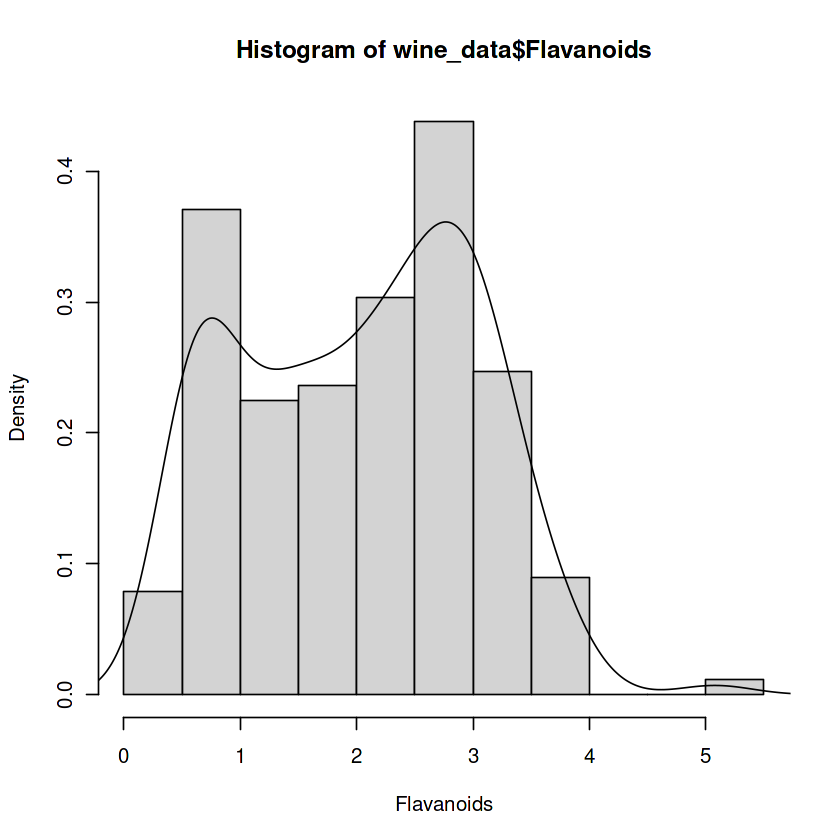

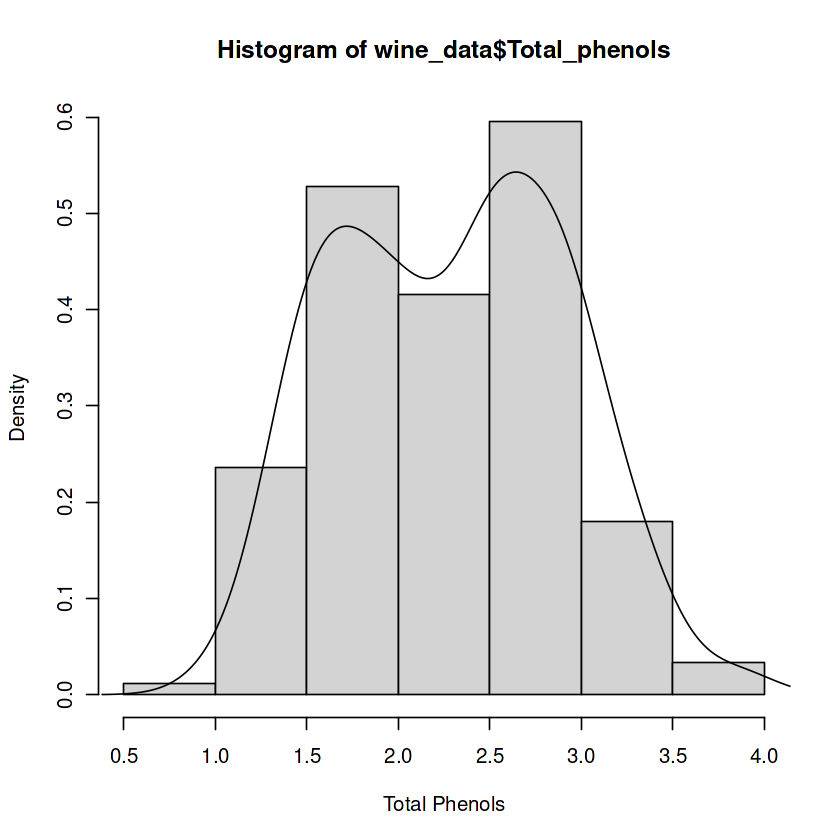

In [17]:
# Your answer here.
wine_data <- read.csv("/kaggle/input/wine-quality/wine_quality_combined.csv")
hist(wine_data$Flavanoids,prob=TRUE,xlab="Flavanoids")
lines(density(wine_data$Flavanoids))

hist(wine_data$Total_phenols, prob=TRUE, xlab="Total Phenols")
lines(density(wine_data$Total_phenols))

#### Although mean values are nearby, the two histograms are different.

1. Shape: Both have 2 modes, but Flavanoids is more right-skewed while Total_phenols is more symmetrical.
2. Spread: Flavanoids has a wider range and a gap, while Total_phenols has a narrow, more continuous distribution.

*Problem 3*

For the different types of quality of alcohol, compare the distributions of its color intensity. Add a note on the outliers and skewness of each category. You can make use of the box plot. (1 + 1 points)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.520   4.550   5.400   5.528   6.225   8.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.280   2.535   2.900   3.087   3.400   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.850   5.438   7.550   7.396   9.225  13.000 

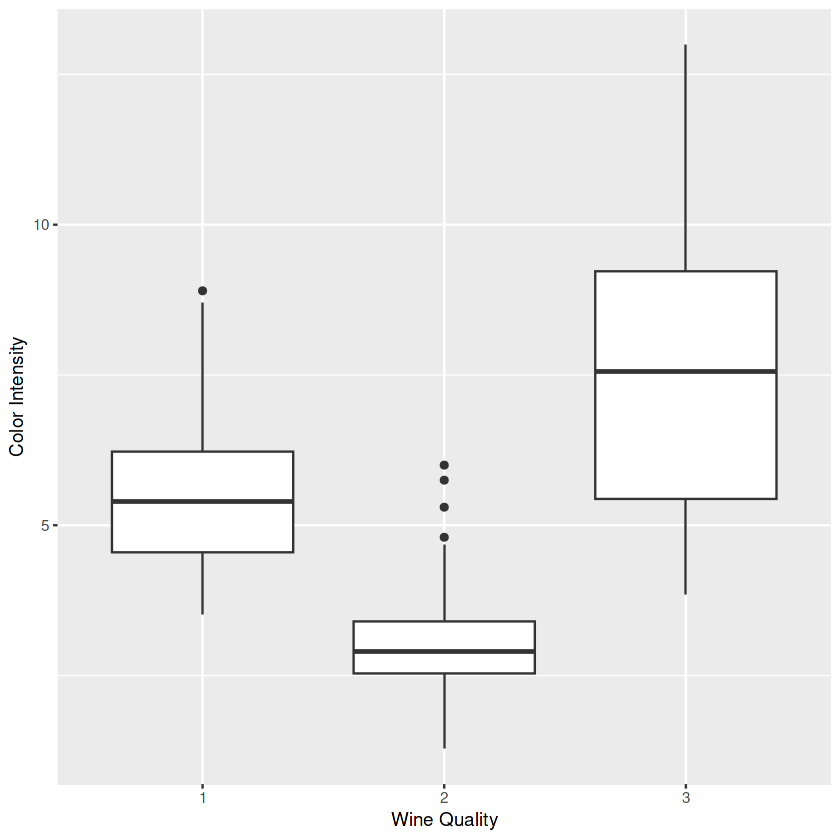

In [18]:
# Your answer here
data <- read.csv("/kaggle/input/wine-quality/wine_quality_combined.csv")

library(ggplot2)

ggplot(data, aes(x = factor(quality), y = Color_intensity)) + geom_boxplot() + labs(x = "Wine Quality", y = "Color Intensity")
summary(subset(data, quality ==1)$Color_intensity)
summary(subset(data, quality ==2)$Color_intensity)
summary(subset(data, quality == 3)$Color_intensity)

#### By observing median v/s mean values to determine skewness:
* Quality =1: Slightly right skewed
* Quality =2: Slightly right skewed
* Quality =3: Slightly left skewed

#### outliers
* Wine Quality 1: There is 1 outlier on the high end of the color intensity.
* Wine Quality 2: There are 4 outliers on the low end of the color intensity.


*Problem 4*

Explain Dimensionality Reduction. Perform PCA on the dataset and extract the proportion of variance explained by each principal component. How many principal components should be retained based on the `scree plot`? Examine the loadings of the first two principal components. Which variables contribute most to these components? (2 points)

**Hint**:
Scree Plot is a common method for determining the number of PCs to be retained through a graphical representation. A Scree Plot is a simple line segment plot that shows the eigenvalues for each individual PC. 

You can learn more about a scree plot [here](https://sanchitamangale12.medium.com/scree-plot-733ed72c8608)

**Hint**:
In PCA, the contribution of each feature to a principal component is called the `loading`. Loadings are compared with the absolute value



#### Dimensionality reduction is a technique used to reduce the number of variables in a dataset while preserving as much variance (information) as possible. This is used when dealing with data with high number of dimensions, as it can help to simplify the analysis.

[1] "Proportion of variance explained by each PC:"
 [1] 0.360473067 0.192307872 0.111528684 0.070669967 0.065592750 0.049387667
 [7] 0.042419435 0.026759541 0.022677977 0.019529566 0.017389189 0.013271306
[13] 0.007992979
[1] "Variables contributing most to PC1:"
[1] "Flavanoids"                    "Total_phenols"                
[3] "X0D280_0D315_of_diluted_wines"
[1] "Variables contributing most to PC2:"
[1] "Color_intensity" "Alcohol"         "Proline"        


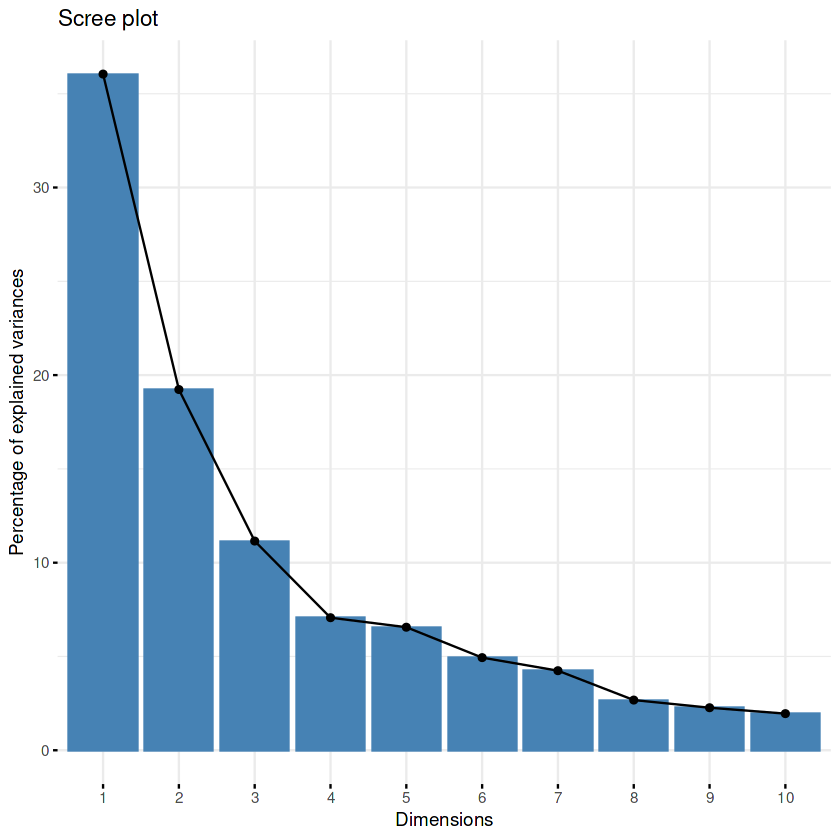

In [24]:
# Your answer here
library(factoextra)
library(ggplot2)

data_std <- scale(data[, -which(names(data) == "quality")]) 
pca_res <- prcomp(data_std)

var_explained <- pca_res$sdev^2/sum(pca_res$sdev^2)

fviz_eig(pca_res)

loadings <- pca_res$rotation[,1:2]

most_contributing_vars <- apply(loadings, 2, function(x) names(sort(abs(x), decreasing = TRUE))[1:3])

print("Proportion of variance explained by each PC:")
print(var_explained)

print("Variables contributing most to PC1:")
print(most_contributing_vars[,1])

print("Variables contributing most to PC2:")
print(most_contributing_vars[,2])

### We retain 2 dimensions based on the scree plot by observing the drop in variance.

### Proportion of variance explained by each PC:
The first principal component (PC1) explains **36.05%** of the total variance in the data.
The second principal component (PC2) explains **19.23%** of the variance.

### Proportion of variance explained by each PC:
The first principal component (PC1) explains **36.05%** of the total variance in the data.
The second principal component (PC2) explains **19.23%** of the variance.

### Variables contributing most to PC1:
'Flavanoids', 'Total_phenols' and 'OD280/OD315 of diluted wines'

### Variables contributing most to PC1:
'Color_intensity', 'Alcohol'and 'Proline'

*Problem 5* 

Now, for the selected components, find the percentage contribution of each feature to each of the components. (Hint: First find the square of the loadings also known as the cos2 values - find percentage contribution using these values) (2 points)

In [25]:
# Your answer here
cos2 <- loadings^2
pc_contributions <- 100*cos2/rowSums(cos2)
print(round(pc_contributions))

                              PC1 PC2
Alcohol                         8  92
Malicacid                      55  45
Ash                             0 100
Alcalinity_of_ash             100   0
Magnesium                      19  81
Total_phenols                  97   3
Flavanoids                    100   0
Nonflavanoid_phenols           99   1
Proanthocyanins                98   2
Color_intensity                 3  97
Hue                            53  47
X0D280_0D315_of_diluted_wines  83  17
Proline                        38  62


*Problem 6*

Generate a plot using the `fviz_pca_var` function to visualize how well each feature is represented by the principal components in the PCA analysis. (Pay attention to the length of the arrows in the fviz_pca_var plot.) (1 point)

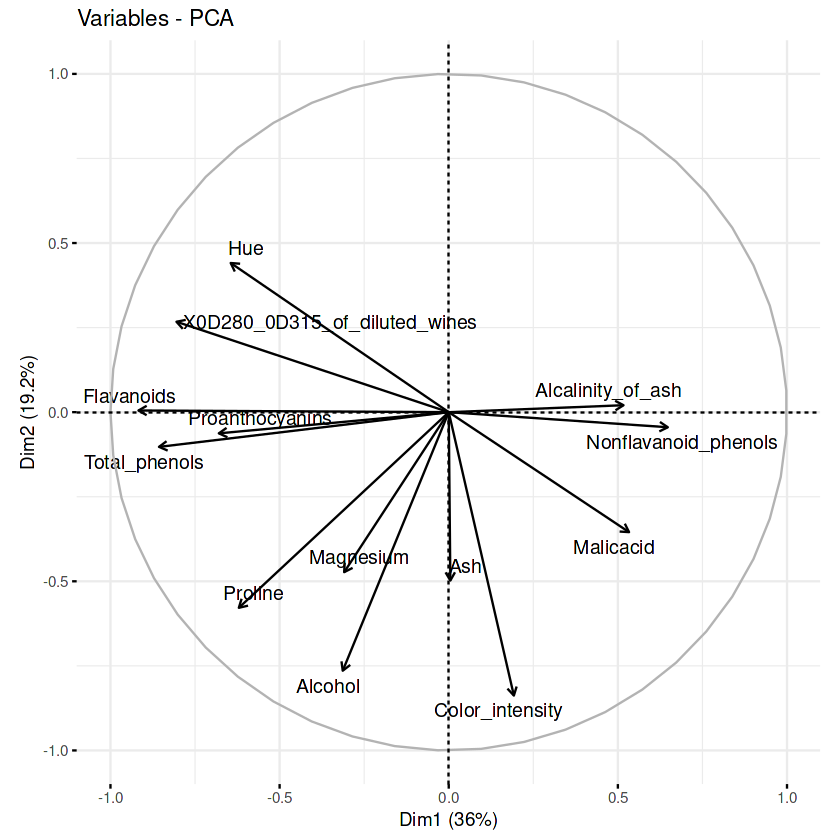

In [26]:
# Your answer here.
library(factoextra)
fviz_pca_var(pca_res, repel="TRUE")

PCA is performed at times when the dataset is large. The reduced set takes considerably smaller space and shorter time to train classifiers/ regression models with only making use of the most influential data.

*fin*